# Nanodegree Engenheiro de Machine Learning
## Proposta de projeto final
Cristian Carlos dos Santos

18 de Agosto de 2019

## AWS DeepRacer Challenge
_(aprox. 2-3 páginas)_

### Histórico do assunto
_(aprox. 1-2 parágrafos)_

Nesta seção, dê informações básicas sobre o assunto no qual o projeto está inserido. Informações históricas relevantes ao projeto devem ser incluídas. Deve estar claro como e por qual motivo um problema deste assunto pode ou deve ser resolvido. Pesquisas acadêmicas relacionadas devem ser citadas de forma adequada nesta seção, incluindo o porquê da pesquisa ser relevante. Encorajamos que seja mencionada qual foi a motivação pessoal do aluno para que ele realizasse a investigação de determinado problema nesse domínio, porém, isso não é obrigatório.

Conforme descrição da própria página da AWS Amazon:

"AWS DeepRacer is a reinforcement learning (RL)-enabled autonomous 1/18th-scale vehicle with supporting services in the AWS Machine Learning ecosystem. It offers an interactive learning system for users of all levels to acquire and refine their skill set in machine learning in general and reinforcement learning in particular. You can use the AWS DeepRacer console to train and evaluate deep reinforcement learning models in simulation and then deploy them to an AWS DeepRacer vehicle for autonomous driving. You can also join AWS DeepRacer League to race in the online Virtual Circuit or the in-person Summit Circuit."

Esse modelo de competição e aprendizado de RL faz com que aprendamos sobre o assunto que é um campo de estudo fascinante, porém muito complexo. Recentemente a Udacity lançou o AWS DeepRacer Scholarship Challenge e como não havia escolhido o tema da minha proposta para o trabalho final resolvi usá-la no meu trabalho. 


### Descrição do problema
_(aprox. 1 parágrafo)_

Nesta seção, descreva claramente o problema a ser resolvido. O problema descrito deve ser bem definido e ter pelo menos uma solução possível. Descreva o problema detalhadamente, de forma que fique claro que o problema é quantificável (pode ser expresso em termos matemáticos ou lógicos), mensurável (pode ser medido por uma métrica e claramente observado), e replicável (pode ser reproduzido e ocorre mais de uma vez).

O desafio é uma corrida. Inicialmente o objetivo é fazer com que o carrinho chegue no final completando 100% da pista. Porém, como o custo com o AWS DeepRacer pode se tornar alto rapidamente, procurarei a melhor solução gastando até U$50,00.

### Conjuntos de dados e entradas
_(aprox. 2-3 parágrafos)_

Nesta seção, o(s) conjunto(s) de dados e/ou entrada(s) considerado(s) para o projeto deve(m) ser descrito(s) detalhadamente, bem como a forma como ele(s) está(ão) relacionado(s) ao problema e por que deverá(ão) ser utilizado(s). Informações tais como a forma de obtenção do conjunto de dados ou entrada e as características do conjunto de dados ou entrada devem ser incluídas com referências relevantes e citações, conforme o necessário. Deve estar claro como o(s) conjunto(s) de dados ou entrada(s) será(ão) utilizado(s) no projeto e se o uso dele(s) é apropriado, dado o contexto do problema.

Para esse projeto usarei o ambiente do AWS Deep Racer e a pista "re:Invent 2018".

O AWS DeepRacer treina os modelos usando o algoritmo PPO (Proximal Policy Optimization). Segundo a vídeo aula "Value Functions" (L4: Reinforcement Learning) do curso AWS DeepRacer, esse algoritmo é utilizado por ser eficiente, estável e fácil de usar comparado com outros algoritmos. O Algoritmo usa duas redes neurais durante o treinamento: Policy Network (Actor Network) e Value Network (Critic Network).

- Policy Network: Decide qual ação tomar de acordo com a imagem recebida no input.
- Value Network: Estima o resultado cumulativo que provavelmente obteremos, considerando a imagem como uma entrada.

#### Reward
Para a construção da função de recompensa temos uma entrada de uma variável chamada "params". Essa variável é uma biblioteca no seguinte formato:

```
{
    "all_wheels_on_track": Boolean,    # flag to indicate if the vehicle is on the track
    "x": float,                        # vehicle's x-coordinate in meters
    "y": float,                        # vehicle's y-coordinate in meters
    "distance_from_center": float,     # distance in meters from the track center 
    "is_left_of_center": Boolean,      # Flag to indicate if the vehicle is on the left side to the track center or not. 
    "heading": float,                  # vehicle's yaw in degrees
    "progress": float,                 # percentage of track completed
    "steps": int,                      # number steps completed
    "speed": float,                    # vehicle's speed in meters per second (m/s)
    "steering_angle": float,          # vehicle's steering angle in degrees
    "track_width": float,              # width of the track
    "waypoints": [[float, float], … ], # list of [x,y] as milestones along the track center
    "closest_waypoints": [int, int]    # indices of the two nearest waypoints.
}
```

Mais informações estão disponíveis no endereço: https://docs.aws.amazon.com/pt_br/deepracer/latest/developerguide/deepracer-reward-function-input.html

#### Hyperparâmetros
Para o desafio temos os seguintes hiperparâmetros disponíveis:
- Gradient descent batch size (Tamanho de lote da descida de gradiente)
- Number of epochs (Número de epochs)
- Learning rate (Taxa de aprendizado)
- Entropy
- Discount factor (Fator de desconto)
- Loss type (Tipo de perda)
- Number of experience episodes between each policy-updating iteration (Número de episódios de experiência entre cada iteração de atualização de política)

Mais informações: https://docs.aws.amazon.com/pt_br/deepracer/latest/developerguide/deepracer-console-train-evaluate-models.html#deepracer-iteratively-adjust-hyperparameters


### Descrição da solução
_(aprox. 1 parágrafo)_

Nesta seção, descreva claramente uma solução para o problema. A solução deve ser relevante ao assunto do projeto e adequada ao(s) conjunto(s) ou entrada(s) proposto(s). Descreva a solução detalhadamente, de forma que fique claro que o problema é quantificável (a solução pode ser expressa em termos matemáticos ou lógicos), mensurável (a solução pode ser medida por uma métrica e claramente observada) e replicável (a solução pode ser reproduzida e ocorre mais de uma vez).

Para solucionar o problema proposto utilizarei como ponto de partida os exemplos de função de recompensa e hiperparâmetros já informados no endereços acima. Na função de recompensa pretendo maximizar ações esperadas, como manter-se na pista, ganhar velocidade e completar voltas. Para os hiperparâmetros, conforme vídeo "Intro to Tuning Hyperparameters" (L5: Tuning your model - AWS DeepRacer Course): "Figuring out what works best for your model is usually done through trial and error."

### Modelo de referência (benchmark)
_(aproximadamente 1-2 parágrafos)_

Nesta seção, forneça os detalhes de um modelo ou resultado de referência que esteja relacionado ao assunto, definição do problema e solução proposta. Idealmente, o resultado ou modelo de referência contextualiza os métodos existentes ou informações conhecidas sobre o assunto e problema propostos, que podem então ser objetivamente comparados à solução. Descreva detalhadamente como o resultado ou modelo de referência é mensurável (pode ser medido por alguma métrica e claramente observado).

Como referência, o ganhador do “re:Invent 2018" completou a volta em 12.68 secs. Para este modelo foi usada a seguinte função de recompensa:

```
def reward_function(params):
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']
    all_wheels_on_track = params['all_wheels_on_track']
    speed = params['speed']
    SPEED_THRESHOLD = 1.0 

    
    # Calculate 3 markers that are at varying distances away from the center line
    marker_1 = 0.1 * track_width
    marker_2 = 0.25 * track_width
    marker_3 = 0.5 * track_width
    
    # Give higher reward if the car is closer to center line and vice versa
    if distance_from_center <= marker_1:
        reward = 1.0
    elif distance_from_center <= marker_2:
        reward = 0.5
    elif distance_from_center <= marker_3:
        reward = 0.1
    else:
        reward = 1e-3  # likely crashed/ close to off track

    if not all_wheels_on_track:
		# Penalize if the car goes off track
        reward = 1e-3
    elif speed < SPEED_THRESHOLD:
		# Penalize if the car goes too slow
        reward = reward + 0.5
    else:
		# High reward if the car stays on track and goes fast
        reward = reward + 1.0

    return float(reward)
```

Já em hyperparâmetros foram utilizados os seguinte:

- Gradient descent batch size: 64
- Entropy: 0.01
- Discount factor 0.666
- Loss type: Huber
- Learning Rate: 0.0003
- Number of experience episodes between each policy-updating iteration: 20
- Number of epochs: 10

A partir desses parâmetros como referência desejo trilhar o caminho entre essa ótima referência e os parâmetros padrões. Se possível, aprimorar ainda mais o modelo e testar os resultados em outra pista.

Fonte: https://medium.com/vaibhav-malpanis-blog/how-to-win-at-deepracer-league-code-and-model-included-27742b868794

### Métricas de avaliação
_(aprox. 1-2 parágrafos)_

Nesta seção, proponha ao menos uma métrica de avaliação que pode ser usada para quantificar o desempenho tanto do modelo de benchmark como do modelo de solução apresentados. A(s) métrica(s) de avaliação proposta(s) deve(m) ser adequada(s), considerando o contexto dos dados, da definição do problema e da solução pretendida. Descreva como a(s) métrica(s) de avaliação pode(m) ser obtida(s) e forneça um exemplo de representação matemática para ela(s) (se aplicável). Métricas de avaliação complexas devem ser claramente definidas e quantificáveis (podem ser expressas em termos matemáticos ou lógicos)

Para a métrica de avaliação a ideia é usar o tempo de conclusão de volta, as recompensas por iteração e a avaliação do algoritmo em pistas diferentes. Para facilitar essa análise utilizarei o Jupyter notebook disponibilizado no artigo "Using Jupyter Notebook for analysing DeepRacer's logs".

Artigo disponível em: https://codelikeamother.uk/using-jupyter-notebook-for-analysing-deepracer-s-logs

### Design do projeto
_(aprox. 1 página)_

Nesta seção final, sintetize um fluxo de trabalho teórico para obtenção de uma solução para o problema em questão. Discuta detalhadamente quais estratégias você considera utilizar, quais análises de dados podem ser necessárias de antemão e quais algoritmos serão considerados na sua implementação. O fluxo de trabalho e discussão propostos devem estar alinhados com as seções anteriores. Adicionalmente, você poderá incluir pequenas visualizações, pseudocódigo ou diagramas para auxiliar na descrição do design do projeto, mas não é obrigatório. A discussão deve seguir claramente o fluxo de trabalho proposto para o projeto de conclusão.

O fluxo de trabalho inicial é o seguinte:

#### Experimentação do ambiente AWS DeepRacer
Aqui a ideia é treinar o modelo padrão e o modelo de benchmark durante 5 minutos para avaliar recursos utilizados e resultados obtidos.

#### Avaliação do impacto de cada parâmetro da função de recompensa
Conforme já listado anteriormente existem vários parâmetros de entrada para contrução da função de recompensa. Inicialmente pretendo trabalhar o seguintes parâmetros do modelo padrão:

- **all_wheels_on_track (True|False):** Indica se alguma roda do veículo está fora da pista. Pretendo penalizar o modelo caso alguma roda venha a sair da pista.
- **distance_from_center (0:~track_width/2):** Deslocamento, em metros, entre o centro do veículo e o centro da pista. Inicialmente vou recompensar caso o veículo esteja centralizado na pista.
- **progress (0:100):** Indicador de progresso da pista. Pretendo descontar da recompensa um fator conforme o percentual de conclusão.
- **steering_angle (-30:30):** Ângulo de direção, em graus, das rodas dianteiras a partir da linha central do veículo. Pretendo usar esse parâmetro para manter o veículo paralelo a linha central da pista. 
- **speed (0.0:5.0):** Velocidade do veículo. Vou estudar a aceleração do veículo em relação as retas x curvas. Se for possível, usarei em conjunto com steering_angle para avaliar a diminuição de velocidade nas curvas.

#### Comparação da função de recompensa ótima e da função de recompensa desenvolvida por mim
A partir dos tempos de treinamentos definidos vou comprar as duas funções com notebook "DeepRacer Log Analysis". Ali é possível verificar como as recompensas se deram e como foram os desempenhos nas pistas a cada episódio.

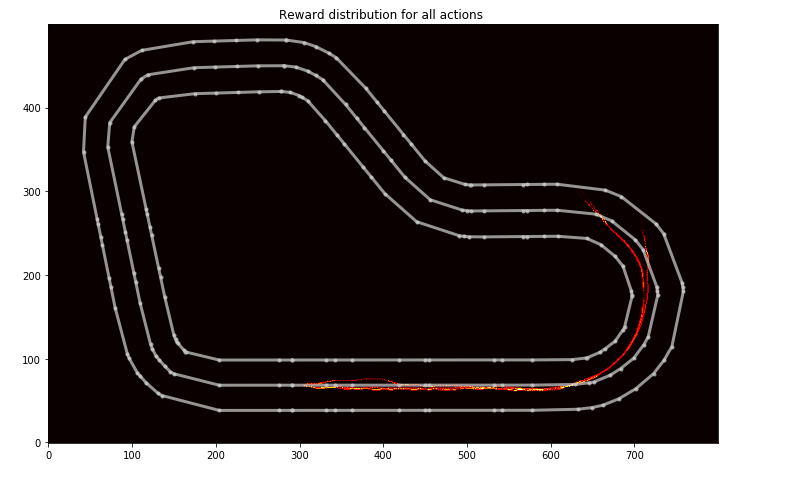

#### Avaliação do impacto dos hyperparâmetros para o modelo.
Quando encontrar uma função de recompensa que entenda que seja satisfatória, vou buscar a otimização de parâmetros. É bem possível que venha experimentar a alteração da taxa de aprendizado durante o processo de definição da função de recompensa, mas gostaria de me focar nesta etapa para buscar otimizar parâmetros específicos.

#### Ajustes dos parâmetro conforme o desempenho obtido.
Após entender que os parâmetros estejam adequados, irei avaliar novamente os resultados obtidos no notebook "DeepRacer Log Analysis".

#### Comparação dos hyperparâmetros ótimos e dos hyperparâmetros definidos por mim
Neste ponto pretendo avaliar os impactos dos parâmetro definido no meu modelo em relação ao modelo ótimo.Também pretendo inverter os parâmetros para avaliar o comportamento de cada modelo. Essas avaliações também serão realizadas no notebook "DeepRacer Log Analysis".

#### Revisão final da função de recompensa e hyperparâmetros com base nos logs obtidos.
Com o processo terminado pretendo comparar os dois modelos, treinando-os a partir do zero, pelo mesmo tempo e comparar a performance dos dois. Entenda performance como percentual de conclusão da pista e tempo decorrido até a conclusão. Neste momento também irei aplicar o modelo treinado em outra pista diferente da original treinada para avaliar sua performance.

#### Exportação do modelo final e avaliação do mesmo com base no leaderboard. 
Com base no meu modelo, se ele for satisfatório, exportarei e enviarei para a corrida virtual.

-----------

**Antes de enviar sua proposta, pergunte-se. . .**

- A proposta que você escreveu segue uma estrutura bem organizada, similar ao modelo de projeto?
- Todas as seções (em especial, **Descrição da solução** e **Design do projeto**) estão escritas de uma forma clara, concisa e específica? Existe algum termo ou frase ambígua que precise de esclarecimento?
- O público-alvo de seu projeto será capaz de entender sua proposta?
- Você revisou sua proposta de projeto adequadamente, de forma a minimizar a quantidade de erros gramaticais e ortográficos?
- Todos os recursos usados neste projeto foram corretamente citados e referenciados?
